In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
path=Path('C:/Users/Mikhail/Desktop/jupyter fast ai/planet-understanding-the-amazon-from-space')

In [4]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

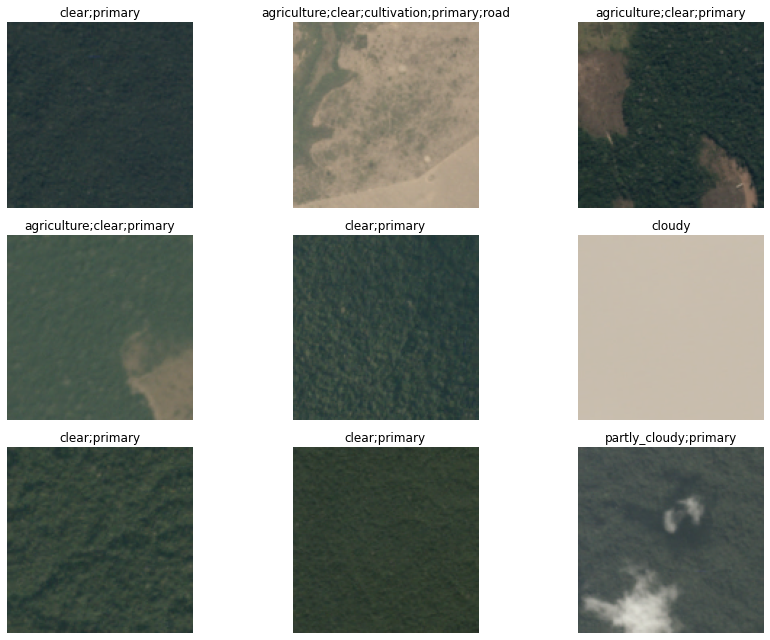

In [8]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score])

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


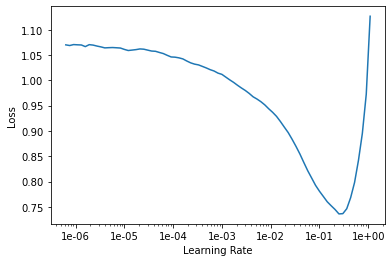

In [11]:
learn.recorder.plot()

In [12]:
lr = 0.01

In [13]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.112089,0.095336,0.954402,0.917488,02:10


In [14]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.112513,0.097837,0.949417,0.915543,02:07
1,0.103292,0.092112,0.952295,0.918649,02:08
2,0.095976,0.088742,0.957556,0.922828,02:08
3,0.094960,0.086745,0.956233,0.924937,02:08


In [15]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


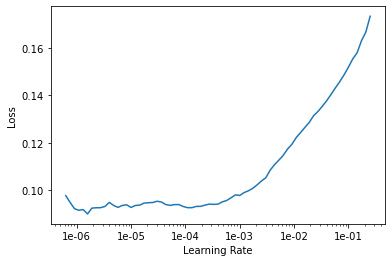

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096737,0.093307,0.951989,0.915706,02:30
1,0.095268,0.089025,0.955317,0.922279,02:30
2,0.089543,0.085790,0.956276,0.925130,02:30
3,0.083655,0.083569,0.957352,0.927924,02:30
4,0.080723,0.082892,0.958609,0.928649,02:31


In [18]:
learn.save('stage-2-rn50')

In [19]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

In [20]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [21]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


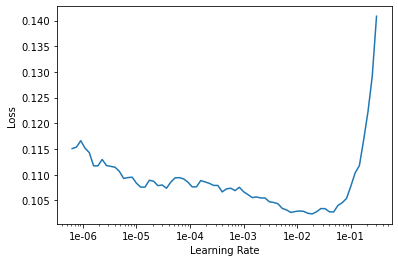

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr=1e-2/2

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.091084,0.085307,0.957723,0.926404,04:23
1,0.090001,0.084129,0.959649,0.928164,04:22
2,0.085941,0.082954,0.960491,0.927430,04:23
3,0.084085,0.081812,0.959067,0.929860,04:23
4,0.081360,0.081329,0.959220,0.930818,04:23


In [25]:
learn.save('stage-2-256-rn50')

In [26]:
learn.export()